In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

# Load and Assess dataset

In [818]:
df = pd.read_csv('benchmark_data.csv')
df.shape

(79440, 17)

In [819]:
df.head()

,Unnamed: 0,result,table,_start,_stop,_time,_value,APP_NAME,_field,_measurement,destType,destinationCredentialId,jobId,ods_user,sourceCredentialId,sourceType,transfer_node_name
0,NaN,NaN,0,2023-04-27T17:24:37.601826436Z,2023-04-29T17:24:37.601826436Z,2023-04-28T16:05:48.352Z,96,jgoldverg@gmail.com-cc_uc,active_core_count,transfer_data,vfs,jgoldverg@gmail.com-cc_uc,0,jgoldverg@gmail.com,httpTaccNginx,http,jgoldverg@gmail.com-cc_uc
1,NaN,NaN,0,2023-04-27T17:24:37.601826436Z,2023-04-29T17:24:37.601826436Z,2023-04-28T16:06:03.351Z,96,jgoldverg@gmail.com-cc_uc,active_core_count,transfer_data,vfs,jgoldverg@gmail.com-cc_uc,0,jgoldverg@gmail.com,httpTaccNginx,http,jgoldverg@gmail.com-cc_uc
2,NaN,NaN,0,2023-04-27T17:24:37.601826436Z,2023-04-29T17:24:37.601826436Z,2023-04-28T16:06:18.35Z,96,jgoldverg@gmail.com-cc_uc,active_core_count,transfer_data,vfs,jgoldverg@gmail.com-cc_uc,0,jgoldverg@gmail.com,httpTaccNginx,http,jgoldverg@gmail.com-cc_uc
3,NaN,NaN,0,2023-04-27T17:24:37.601826436Z,2023-04-29T17:24:37.601826436Z,2023-04-28T16:06:33.353Z,96,jgoldverg@gmail.com-cc_uc,active_core_count,transfer_data,vfs,jgoldverg@gmail.com-cc_uc,0,jgoldverg@gmail.com,httpTaccNginx,http,jgoldverg@gmail.com-cc_uc
4,NaN,NaN,0,2023-04-27T17:24:37.601826436Z,2023-04-29T17:24:37.601826436Z,2023-04-28T16:06:48.355Z,96,jgoldverg@gmail.com-cc_uc,active_core_count,transfer_data,vfs,jgoldverg@gmail.com-cc_uc,0,jgoldverg@gmail.com,httpTaccNginx,http,jgoldverg@gmail.com-cc_uc


In [ ]:
with open('list_v2.pkl', 'rb') as f:
    df2 = pkl.load(f)


In [ ]:
df2[0].describe()[['throughput', 'rtt']]

,throughput,rtt
count,2.600000e+01,26.000000
mean,2.036602e+08,232.734077
std,2.003169e+08,8.595367
min,7.946745e+07,211.472000
25%,1.098217e+08,228.448500
50%,1.382421e+08,234.071500
75%,1.805377e+08,239.423000
max,1.018078e+09,245.443000


In [820]:
df_pivot = pd.pivot_table(df, index='_time', columns='_field', values='_value', aggfunc=np.sum)
df_pivot = df_pivot.drop(['_field', 'string', 'true'], axis=1)
df_pivot.columns.rename(None, inplace=True)

In [821]:
df_pivot.head()

,active_core_count,allocatedMemory,avgFileSize,bytesDownloaded,bytesUploaded,bytes_recv,bytes_sent,chunkSize,concurrency,cpu_arch,...,packet_loss_rate,packets_recv,packets_sent,parallelism,pipelining,read_throughput,rtt,source_latency,source_rtt,write_throughput
_time,,,,,,,,,,,,,,,,,,,,,
2023-04-28T16:03:17.465Z,96,14684258304,9203501348,250000000,250000000,93179870042909,1271275862725,50000000,32,Linux-5.4.0-139-generic-x86_64-with-glibc2.29,...,0,61643094202,5293516855,32,1,391.9263178522438,52.434,16.5,33,1858.736059479554
2023-04-28T16:05:48.352Z,96,9479127040,9203501348,350000000,350000000,93188828058364,1271362992953,50000000,32,Linux-5.4.0-139-generic-x86_64-with-glibc2.29,...,0,61649016549,5294801691,32,1,367.11682181722824,59.078,17.5,35,620.2924235711122
2023-04-28T16:06:03.351Z,96,11668553728,9203501348,2500000000,2450000000,93194361387067,1271420704124,50000000,32,Linux-5.4.0-139-generic-x86_64-with-glibc2.29,...,0,61652671464,5295670786,32,1,883.9388314328648,47.288,17,34,1482.7142749073303
2023-04-28T16:06:18.35Z,96,20287848448,9203501348,6300000000,6300000000,93199519409675,1271482907806,50000000,32,Linux-5.4.0-139-generic-x86_64-with-glibc2.29,...,0,61656078716,5296606185,32,1,1339.8553806890684,69.572,18,36,3383.4586466165415
2023-04-28T16:06:33.353Z,96,22984785920,9203501348,5100000000,5100000000,93205149131522,1271549992717,50000000,32,Linux-5.4.0-139-generic-x86_64-with-glibc2.29,...,0,61659797620,5297615901,32,1,777.6909440939329,61.547,17,34,2748.770464191875


In [822]:
df_pivot.describe()

,active_core_count,allocatedMemory,avgFileSize,bytesDownloaded,bytesUploaded,bytes_recv,bytes_sent,chunkSize,concurrency,cpu_arch,...,packet_loss_rate,packets_recv,packets_sent,parallelism,pipelining,read_throughput,rtt,source_latency,source_rtt,write_throughput
count,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054,...,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054
unique,1,142,2,1525,1504,2054,2054,5,5,1,...,1,2054,2054,5,1,2053,1984,68,68,2045
top,96,32178700288,981592339,3820000000,3820000000,93179870042909,1271275862725,20000000,32,Linux-5.4.0-139-generic-x86_64-with-glibc2.29,...,0,61643094202,5293516855,32,1,1942.3368740515934,56.876,17,34,0
freq,2054,1064,2048,10,10,1,1,1906,541,2054,...,2054,1,1,554,2054,2,3,817,817,6


In [ ]:
df1.head()

""
_time
2023-04-03T20:12:18.797Z
2023-04-03T20:12:32.773Z
2023-04-03T20:13:48.346Z
2023-04-03T20:18:48.341Z
2023-04-03T20:19:02.343Z


In [823]:
df_pivot.rtt

_time
2023-04-28T16:03:17.465Z    52.434
2023-04-28T16:05:48.352Z    59.078
2023-04-28T16:06:03.351Z    47.288
2023-04-28T16:06:18.35Z     69.572
2023-04-28T16:06:33.353Z    61.547
                             ...  
2023-04-29T01:10:18.361Z    70.635
2023-04-29T01:10:32.358Z    60.261
_time                          NaN
dateTime:RFC3339               NaN
false                          NaN
Name: rtt, Length: 2057, dtype: object

In [824]:
df_pivot.rtt = pd.to_numeric(df_pivot.rtt)

In [825]:
df_pivot.rtt

_time
2023-04-28T16:03:17.465Z    52.434
2023-04-28T16:05:48.352Z    59.078
2023-04-28T16:06:03.351Z    47.288
2023-04-28T16:06:18.35Z     69.572
2023-04-28T16:06:33.353Z    61.547
                             ...  
2023-04-29T01:10:18.361Z    70.635
2023-04-29T01:10:32.358Z    60.261
_time                          NaN
dateTime:RFC3339               NaN
false                          NaN
Name: rtt, Length: 2057, dtype: float64

In [826]:
for c in df_pivot.columns:
    df_pivot[c] = pd.to_numeric(df_pivot[c], errors='ignore')


In [827]:
df1 = df_pivot.select_dtypes(include=np.number)

In [828]:
df1.head()

,active_core_count,allocatedMemory,avgFileSize,bytesDownloaded,bytesUploaded,bytes_recv,bytes_sent,chunkSize,concurrency,cpu_frequency_current,...,packet_loss_rate,packets_recv,packets_sent,parallelism,pipelining,read_throughput,rtt,source_latency,source_rtt,write_throughput
_time,,,,,,,,,,,,,,,,,,,,,
2023-04-28T16:03:17.465Z,96.0,1.468426e+10,9.203501e+09,2.500000e+08,2.500000e+08,9.317987e+13,1.271276e+12,50000000.0,32.0,1098.725833,...,0.0,6.164309e+10,5.293517e+09,32.0,1.0,391.926318,52.434,16.5,33.0,1858.736059
2023-04-28T16:05:48.352Z,96.0,9.479127e+09,9.203501e+09,3.500000e+08,3.500000e+08,9.318883e+13,1.271363e+12,50000000.0,32.0,1503.358479,...,0.0,6.164902e+10,5.294802e+09,32.0,1.0,367.116822,59.078,17.5,35.0,620.292424
2023-04-28T16:06:03.351Z,96.0,1.166855e+10,9.203501e+09,2.500000e+09,2.450000e+09,9.319436e+13,1.271421e+12,50000000.0,32.0,1183.381000,...,0.0,6.165267e+10,5.295671e+09,32.0,1.0,883.938831,47.288,17.0,34.0,1482.714275
2023-04-28T16:06:18.35Z,96.0,2.028785e+10,9.203501e+09,6.300000e+09,6.300000e+09,9.319952e+13,1.271483e+12,50000000.0,32.0,1317.248583,...,0.0,6.165608e+10,5.296606e+09,32.0,1.0,1339.855381,69.572,18.0,36.0,3383.458647
2023-04-28T16:06:33.353Z,96.0,2.298479e+10,9.203501e+09,5.100000e+09,5.100000e+09,9.320515e+13,1.271550e+12,50000000.0,32.0,1388.735698,...,0.0,6.165980e+10,5.297616e+09,32.0,1.0,777.690944,61.547,17.0,34.0,2748.770464


In [829]:
df1.columns

Index(['active_core_count', 'allocatedMemory', 'avgFileSize',
       'bytesDownloaded', 'bytesUploaded', 'bytes_recv', 'bytes_sent',
       'chunkSize', 'concurrency', 'cpu_frequency_current',
       'cpu_frequency_max', 'cpu_frequency_min', 'destination_latency',
       'destination_rtt', 'dropin', 'dropout', 'errin', 'errout', 'freeMemory',
       'jobSize', 'latency', 'maxMemory', 'memory', 'nic_mtu',
       'packet_loss_rate', 'packets_recv', 'packets_sent', 'parallelism',
       'pipelining', 'read_throughput', 'rtt', 'source_latency', 'source_rtt',
       'write_throughput'],
      dtype='object')

In [830]:
np.any(np.isnan(df1.dropout))

True

In [831]:
df1 = df1.dropna(axis=1, how='all')

In [832]:
df1_stripped = df1.dropna(axis=0, how='any')

In [833]:
df1_stripped.columns

Index(['active_core_count', 'allocatedMemory', 'avgFileSize',
       'bytesDownloaded', 'bytesUploaded', 'bytes_recv', 'bytes_sent',
       'chunkSize', 'concurrency', 'cpu_frequency_current',
       'cpu_frequency_max', 'cpu_frequency_min', 'destination_latency',
       'destination_rtt', 'dropin', 'dropout', 'errin', 'errout', 'freeMemory',
       'jobSize', 'latency', 'maxMemory', 'memory', 'nic_mtu',
       'packet_loss_rate', 'packets_recv', 'packets_sent', 'parallelism',
       'pipelining', 'read_throughput', 'rtt', 'source_latency', 'source_rtt',
       'write_throughput'],
      dtype='object')

In [834]:
statistics = df1_stripped.describe()

In [835]:
columns = statistics.columns
print(len(columns))

34


In [836]:
statistics[columns[:12]]

,active_core_count,allocatedMemory,avgFileSize,bytesDownloaded,bytesUploaded,bytes_recv,bytes_sent,chunkSize,concurrency,cpu_frequency_current,cpu_frequency_max,cpu_frequency_min
count,2054.0,2.054000e+03,2.054000e+03,2.054000e+03,2.054000e+03,2.054000e+03,2.054000e+03,2.054000e+03,2054.000000,2054.000000,2054.0,2054.0
mean,96.0,2.428553e+10,1.005610e+09,7.981228e+09,7.961821e+09,1.014227e+14,1.320666e+12,1.959422e+07,14.029211,1459.258025,4000.0,1000.0
std,0.0,8.717203e+09,4.438320e+08,4.608016e+09,4.634703e+09,5.467582e+12,2.390285e+10,5.083770e+06,11.768804,269.993708,0.0,0.0
min,96.0,2.952790e+09,9.815923e+08,4.288000e+06,0.000000e+00,9.317987e+13,1.271276e+12,4.288000e+06,2.000000,1020.769333,4000.0,1000.0
25%,96.0,1.762027e+10,9.815923e+08,4.575728e+09,4.562888e+09,9.672454e+13,1.298989e+12,2.000000e+07,4.000000,1276.973047,4000.0,1000.0
50%,96.0,3.217870e+10,9.815923e+08,6.433600e+09,6.420000e+09,1.007717e+14,1.325389e+12,2.000000e+07,8.000000,1410.078115,4000.0,1000.0
75%,96.0,3.217870e+10,9.815923e+08,1.173966e+10,1.173966e+10,1.066134e+14,1.343059e+12,2.000000e+07,32.000000,1583.685542,4000.0,1000.0
max,96.0,3.217870e+10,9.203501e+09,1.814000e+10,1.820000e+10,1.104387e+14,1.350105e+12,5.000000e+07,32.000000,3087.702198,4000.0,1000.0


In [837]:
statistics[columns[12:]]

,destination_latency,destination_rtt,dropin,dropout,errin,errout,freeMemory,jobSize,latency,maxMemory,...,packet_loss_rate,packets_recv,packets_sent,parallelism,pipelining,read_throughput,rtt,source_latency,source_rtt,write_throughput
count,2054.0,2054.0,2054.000000,2054.0,2054.0,2054.0,2.054000e+03,2.054000e+03,2054.000000,2.054000e+03,...,2054.0,2.054000e+03,2.054000e+03,2054.000000,2054.0,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,0.0,0.0,95970.501461,0.0,0.0,0.0,1.287559e+10,1.313373e+11,4.424207,3.217870e+10,...,0.0,6.708822e+10,6.034559e+09,14.128530,1.0,3705.168718,66.644292,19.916991,39.833982,4662.663503
std,0.0,0.0,2511.926483,0.0,0.0,0.0,6.199094e+09,3.622645e+09,23.942832,0.000000e+00,...,0.0,3.611747e+09,3.594603e+08,11.902962,0.0,2648.891961,31.216349,27.276904,54.553809,2540.962422
min,0.0,0.0,93712.000000,0.0,0.0,0.0,1.659707e+08,6.442451e+10,1.648964,3.217870e+10,...,0.0,6.164309e+10,5.293517e+09,2.000000,1.0,13.083143,45.704000,16.500000,33.000000,0.000000
25%,0.0,0.0,94211.000000,0.0,0.0,0.0,8.078439e+09,1.315334e+11,2.314080,3.217870e+10,...,0.0,6.398473e+10,5.708195e+09,4.000000,1.0,1438.502489,55.762000,16.500000,33.000000,2633.107672
50%,0.0,0.0,95061.000000,0.0,0.0,0.0,1.205769e+10,1.315334e+11,2.865337,3.217870e+10,...,0.0,6.665814e+10,6.105397e+09,8.000000,1.0,2467.370134,60.177000,17.000000,34.000000,3910.542027
75%,0.0,0.0,97866.000000,0.0,0.0,0.0,1.678177e+10,1.315334e+11,3.338964,3.217870e+10,...,0.0,7.051706e+10,6.371485e+09,32.000000,1.0,6329.666546,66.850000,17.500000,35.000000,6990.196034
max,0.0,0.0,101270.000000,0.0,0.0,0.0,3.027422e+10,1.315334e+11,1034.322201,3.217870e+10,...,0.0,7.304393e+10,6.477423e+09,32.000000,1.0,9004.057061,589.369000,528.500000,1057.000000,16736.401674


In [838]:
df1

,active_core_count,allocatedMemory,avgFileSize,bytesDownloaded,bytesUploaded,bytes_recv,bytes_sent,chunkSize,concurrency,cpu_frequency_current,...,packet_loss_rate,packets_recv,packets_sent,parallelism,pipelining,read_throughput,rtt,source_latency,source_rtt,write_throughput
_time,,,,,,,,,,,,,,,,,,,,,
2023-04-28T16:03:17.465Z,96.0,1.468426e+10,9.203501e+09,2.500000e+08,2.500000e+08,9.317987e+13,1.271276e+12,50000000.0,32.0,1098.725833,...,0.0,6.164309e+10,5.293517e+09,32.0,1.0,391.926318,52.434,16.5,33.0,1858.736059
2023-04-28T16:05:48.352Z,96.0,9.479127e+09,9.203501e+09,3.500000e+08,3.500000e+08,9.318883e+13,1.271363e+12,50000000.0,32.0,1503.358479,...,0.0,6.164902e+10,5.294802e+09,32.0,1.0,367.116822,59.078,17.5,35.0,620.292424
2023-04-28T16:06:03.351Z,96.0,1.166855e+10,9.203501e+09,2.500000e+09,2.450000e+09,9.319436e+13,1.271421e+12,50000000.0,32.0,1183.381000,...,0.0,6.165267e+10,5.295671e+09,32.0,1.0,883.938831,47.288,17.0,34.0,1482.714275
2023-04-28T16:06:18.35Z,96.0,2.028785e+10,9.203501e+09,6.300000e+09,6.300000e+09,9.319952e+13,1.271483e+12,50000000.0,32.0,1317.248583,...,0.0,6.165608e+10,5.296606e+09,32.0,1.0,1339.855381,69.572,18.0,36.0,3383.458647
2023-04-28T16:06:33.353Z,96.0,2.298479e+10,9.203501e+09,5.100000e+09,5.100000e+09,9.320515e+13,1.271550e+12,50000000.0,32.0,1388.735698,...,0.0,6.165980e+10,5.297616e+09,32.0,1.0,777.690944,61.547,17.0,34.0,2748.770464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-29T01:10:18.361Z,96.0,1.163919e+10,9.815923e+08,3.840000e+09,3.840000e+09,1.104364e+14,1.350102e+12,20000000.0,2.0,1254.076635,...,0.0,7.304236e+10,6.477380e+09,2.0,1.0,2032.687091,70.635,17.0,34.0,2070.080863
2023-04-29T01:10:32.358Z,96.0,1.163919e+10,9.815923e+08,1.734836e+09,1.734836e+09,1.104387e+14,1.350105e+12,20000000.0,2.0,1224.255396,...,0.0,7.304393e+10,6.477423e+09,2.0,1.0,1427.114842,60.261,16.5,33.0,1472.227839
_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [839]:
df1 = df1.drop(['_time', 'dateTime:RFC3339', 'false'], axis=0)

In [968]:
choices = df1[['read_throughput', 'source_rtt', 'rtt', 'parallelism', 'concurrency', 'dropin', 'cpu_frequency_current']]

K = 1.02 # non-linear 1.02
B = 0.007 # non-linear 0.2
C = 0.00
D = 0.36

p = choices['parallelism'].to_numpy()
cc = choices['concurrency'].to_numpy()
t = choices['read_throughput'].to_numpy()
cpu_freq = choices['cpu_frequency_current'].to_numpy() / 100

thread_count = D * p * cc

utility = (t / np.power(K, thread_count)) - (B * t * cpu_freq) - (C * t * cc)
choices['utility'] = utility
choices['thread_count'] = choices['parallelism'] * choices['concurrency']
choices['diff_dropin'] = choices['dropin'].diff(periods=1).fillna(0)
choices['log_thread_count'] = np.log2(choices['thread_count'])

utility

/tmp/ipykernel_2245210/3421220051.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choices['utility'] = utility
/tmp/ipykernel_2245210/3421220051.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choices['thread_count'] = choices['parallelism'] * choices['concurrency']
/tmp/ipykernel_2245210/3421220051.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

array([ -29.87861922,  -38.38558149,  -72.62543852, ..., 1666.8603563 ,
       1797.10188867, 1264.69358436])

In [939]:
choices = df1[['read_throughput', 'source_rtt', 'rtt', 'parallelism', 'concurrency', 'dropin']]

K = 1.02 # non-linear 1.02
B = 0.007 # non-linear 0.2
C = 0.00
D = 0.3

p = choices['parallelism'].to_numpy()
cc = choices['concurrency'].to_numpy()
t = choices['read_throughput'].to_numpy()
rtt = choices['source_rtt'].to_numpy()

thread_count = D * p * cc

utility = (t / np.power(K, thread_count)) - (B * t * rtt) - (C * t * cc)
choices['utility'] = utility
utility

/tmp/ipykernel_2245210/2257487933.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choices['utility'] = utility


array([ -89.6411973 ,  -89.10641691, -208.36163257, ..., 1387.98438479,
       1501.17390647, 1063.93832972])

In [973]:
choices.corr(method='spearman')

,read_throughput,source_rtt,rtt,parallelism,concurrency,dropin,cpu_frequency_current,utility,thread_count,diff_dropin,log_thread_count
read_throughput,1.000000,0.014014,0.087828,-0.467673,-0.381406,0.414649,0.389293,0.872597,-0.578726,0.061005,-0.578726
source_rtt,0.014014,1.000000,0.068894,0.223758,0.130009,-0.167867,0.144853,-0.052990,0.209286,-0.046999,0.209286
rtt,0.087828,0.068894,1.000000,-0.034803,-0.159436,0.154047,0.052789,0.112136,-0.122603,-0.007348,-0.122603
parallelism,-0.467673,0.223758,-0.034803,1.000000,0.262864,-0.415631,0.046781,-0.602049,0.797144,-0.135065,0.797144
concurrency,-0.381406,0.130009,-0.159436,0.262864,1.000000,-0.975053,-0.163687,-0.579703,0.783989,-0.073085,0.783989
dropin,0.414649,-0.167867,0.154047,-0.415631,-0.975053,1.000000,0.134539,0.629743,-0.868825,0.097104,-0.868825
cpu_frequency_current,0.389293,0.144853,0.052789,0.046781,-0.163687,0.134539,1.000000,0.286611,-0.094645,-0.020787,-0.094645
utility,0.872597,-0.052990,0.112136,-0.602049,-0.579703,0.629743,0.286611,1.000000,-0.785699,0.092590,-0.785699
thread_count,-0.578726,0.209286,-0.122603,0.797144,0.783989,-0.868825,-0.094645,-0.785699,1.000000,-0.132220,1.000000
diff_dropin,0.061005,-0.046999,-0.007348,-0.135065,-0.073085,0.097104,-0.020787,0.092590,-0.132220,1.000000,-0.132220


In [971]:
# print(choices['parallelism'].to_numpy())
choices.corr(method='pearson')

,read_throughput,source_rtt,rtt,parallelism,concurrency,dropin,cpu_frequency_current,utility,thread_count,diff_dropin,log_thread_count
read_throughput,1.000000,-0.046872,0.037433,-0.443452,-0.343852,0.134063,0.346213,0.875856,-0.559194,0.045748,-0.402099
source_rtt,-0.046872,1.000000,-0.003380,0.090419,0.030584,-0.037154,0.026495,-0.060136,0.059470,-0.010811,0.069030
rtt,0.037433,-0.003380,1.000000,-0.065261,-0.111633,0.121011,-0.012304,0.081281,-0.080539,-0.009245,-0.123619
parallelism,-0.443452,0.090419,-0.065261,1.000000,0.179394,-0.363599,0.048276,-0.574538,0.683570,-0.086768,0.740553
concurrency,-0.343852,0.030584,-0.111633,0.179394,1.000000,-0.756773,-0.167709,-0.533369,0.671556,-0.059336,0.719694
dropin,0.134063,-0.037154,0.121011,-0.363599,-0.756773,1.000000,-0.031576,0.414504,-0.554179,0.068080,-0.843020
cpu_frequency_current,0.346213,0.026495,-0.012304,0.048276,-0.167709,-0.031576,1.000000,0.237586,-0.122017,-0.016904,-0.010554
utility,0.875856,-0.060136,0.081281,-0.574538,-0.533369,0.414504,0.237586,1.000000,-0.641145,0.081969,-0.669427
thread_count,-0.559194,0.059470,-0.080539,0.683570,0.671556,-0.554179,-0.122017,-0.641145,1.000000,-0.068530,0.804913
diff_dropin,0.045748,-0.010811,-0.009245,-0.086768,-0.059336,0.068080,-0.016904,0.081969,-0.068530,1.000000,-0.096946


In [942]:
groups = choices.groupby(['concurrency', 'parallelism']).mean()

In [943]:
groups

read_throughput  source_rtt        rtt  \
concurrency parallelism                                           
2.0         2.0              1978.556138   33.589888  75.759275   
            4.0              3979.813230   33.511111  80.294467   
            8.0              6719.342871   36.436364  61.659327   
            16.0             6842.006765   34.629630  63.023556   
            32.0             4882.480733   57.426230  65.253869   
4.0         2.0              3451.497408   33.669903  62.710524   
            4.0              6355.654159   33.842105  87.458614   
            8.0              7276.021154   36.460000  77.121800   
            16.0             6862.421347   39.240000  75.851120   
            32.0             3868.169346   68.983607  70.975902   
8.0         2.0              6592.418994   35.200000  71.190800   
            4.0              8113.629186   37.844444  61.863533   
            8.0              7632.826851   39.739130  65.463913   
            16.0             4692.501924   45.953125  62.100391   
            32.0             1457.956096   35.346154  62.095054   
16.0        2.0              5990.836094   36.516667  60.937517   
            4.0              6921.536980   34.686275  62.959020   
            8.0              7110.471541   36.260870  61.415957   
            16.0             1575.263889   34.842520  63.119323   
            32.0             1142.038327   43.769231  66.454915   
32.0        2.0              4722.949257   33.855263  62.809645   
            4.0              4642.013245   49.617647  64.351118   
            8.0              2415.560809   35.717172  61.834848   
            16.0             1444.297541   43.325397  63.122563   
            32.0              872.629294   48.656977  61.910674   

                                dropin  cpu_frequency_current      utility  
concurrency parallelism                                                     
2.0         2.0          101182.168539            1337.058660  1737.635717  
            4.0          100003.566667            1422.493317  3362.568917  
            8.0           99446.781818            1581.053063  5248.723339  
            16.0          99383.333333            1600.537983  4677.651885  
            32.0          99258.000000            1533.279273  2570.564228  
4.0         2.0           98363.640777            1297.348364  2943.602518  
            4.0           96680.789474            1433.833801  5021.712856  
            8.0           96041.000000            1629.414469  4947.846161  
            16.0          95816.000000            1605.492671  3579.555811  
            32.0          95816.000000            1708.769816  1105.132159  
8.0         2.0           95387.709091            1530.104375  5163.229225  
            4.0           95363.000000            1725.793478  5471.272129  
            8.0           95323.608696            1714.338114  3912.570022  
            16.0          95061.000000            1510.947309  1375.594697  
            32.0          95061.000000            1448.752835    86.492688  
16.0        2.0           94528.283333            1529.529143  4109.520537  
            4.0           94211.000000            1609.000683  3596.312925  
            8.0           94211.000000            1536.400541  2088.236827  
            16.0          94211.000000            1442.765250    92.896409  
            32.0          94211.000000            1457.547370   -87.360398  
32.0        2.0           94211.000000            1411.002273  2513.390165  
            4.0           93989.647059            1361.717082  1408.497146  
            8.0           93712.000000            1350.990779   147.753002  
            16.0          93712.000000            1328.944638   -98.197875  
            32.0          93712.000000            1390.013480   -85.211081

In [902]:
groups = choices.groupby(['concurrency', 'parallelism'])['read_throughput'].mean()

In [ ]:
groups = groups.drop([1024.0, 320.0, 150.0, 100.0, 0.0, 15.0, 10.0, 6.0], level=1, axis=0)
groups = groups.drop([15.0], level=0, axis=0)

# Attempt 1

<class 'matplotlib.text.Text'>


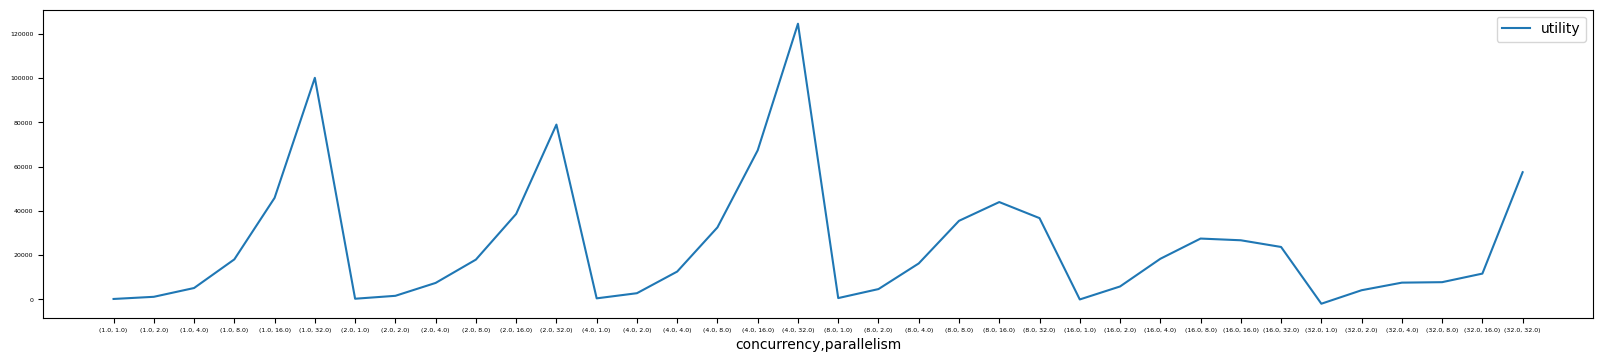

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.text as text

ax = groups.plot(y='utility', kind='line', x_compat=True, figsize=(20, 4), fontsize=4.5)
# ax.xaxis.
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

print(type(ax.xaxis.get_ticklabels()[0]))
hail = []
cnt = 0.
for n in groups.index:
    hail.append(text.Text(cnt, 0, str(n)))
    cnt += 1

test = groups.index.to_numpy()
ax.xaxis.set_ticks(np.arange(0, len(test)), test)
ax
# ax.xaxis.set_ticklabels(hail)
# every_nth = 1
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     print(label)
#     if n % every_nth == 0:
#         label.set_visible(True)

plt.savefig('checkit.png')
plt.show()

In [ ]:
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# conc = groups.index.levels[0].to_numpy()
# paral = groups.index.levels[1].to_numpy()[:10]
col1 = groups.index.to_numpy()
col2 = groups.utility.to_numpy()

col_t1, col_t2 = zip(*col1)
col_t1 = np.array(col_t1)
col_t2 = np.array(col_t2)

print(col1.shape)
print(col2.shape)

test1 = np.column_stack((col_t1, col_t2, col2))

(36,)
(36,)


In [ ]:
df_3d = pd.DataFrame(test1, columns=['concurrency', 'parallelism', 'utility'])

In [ ]:
df_3d.index

RangeIndex(start=0, stop=36, step=1)

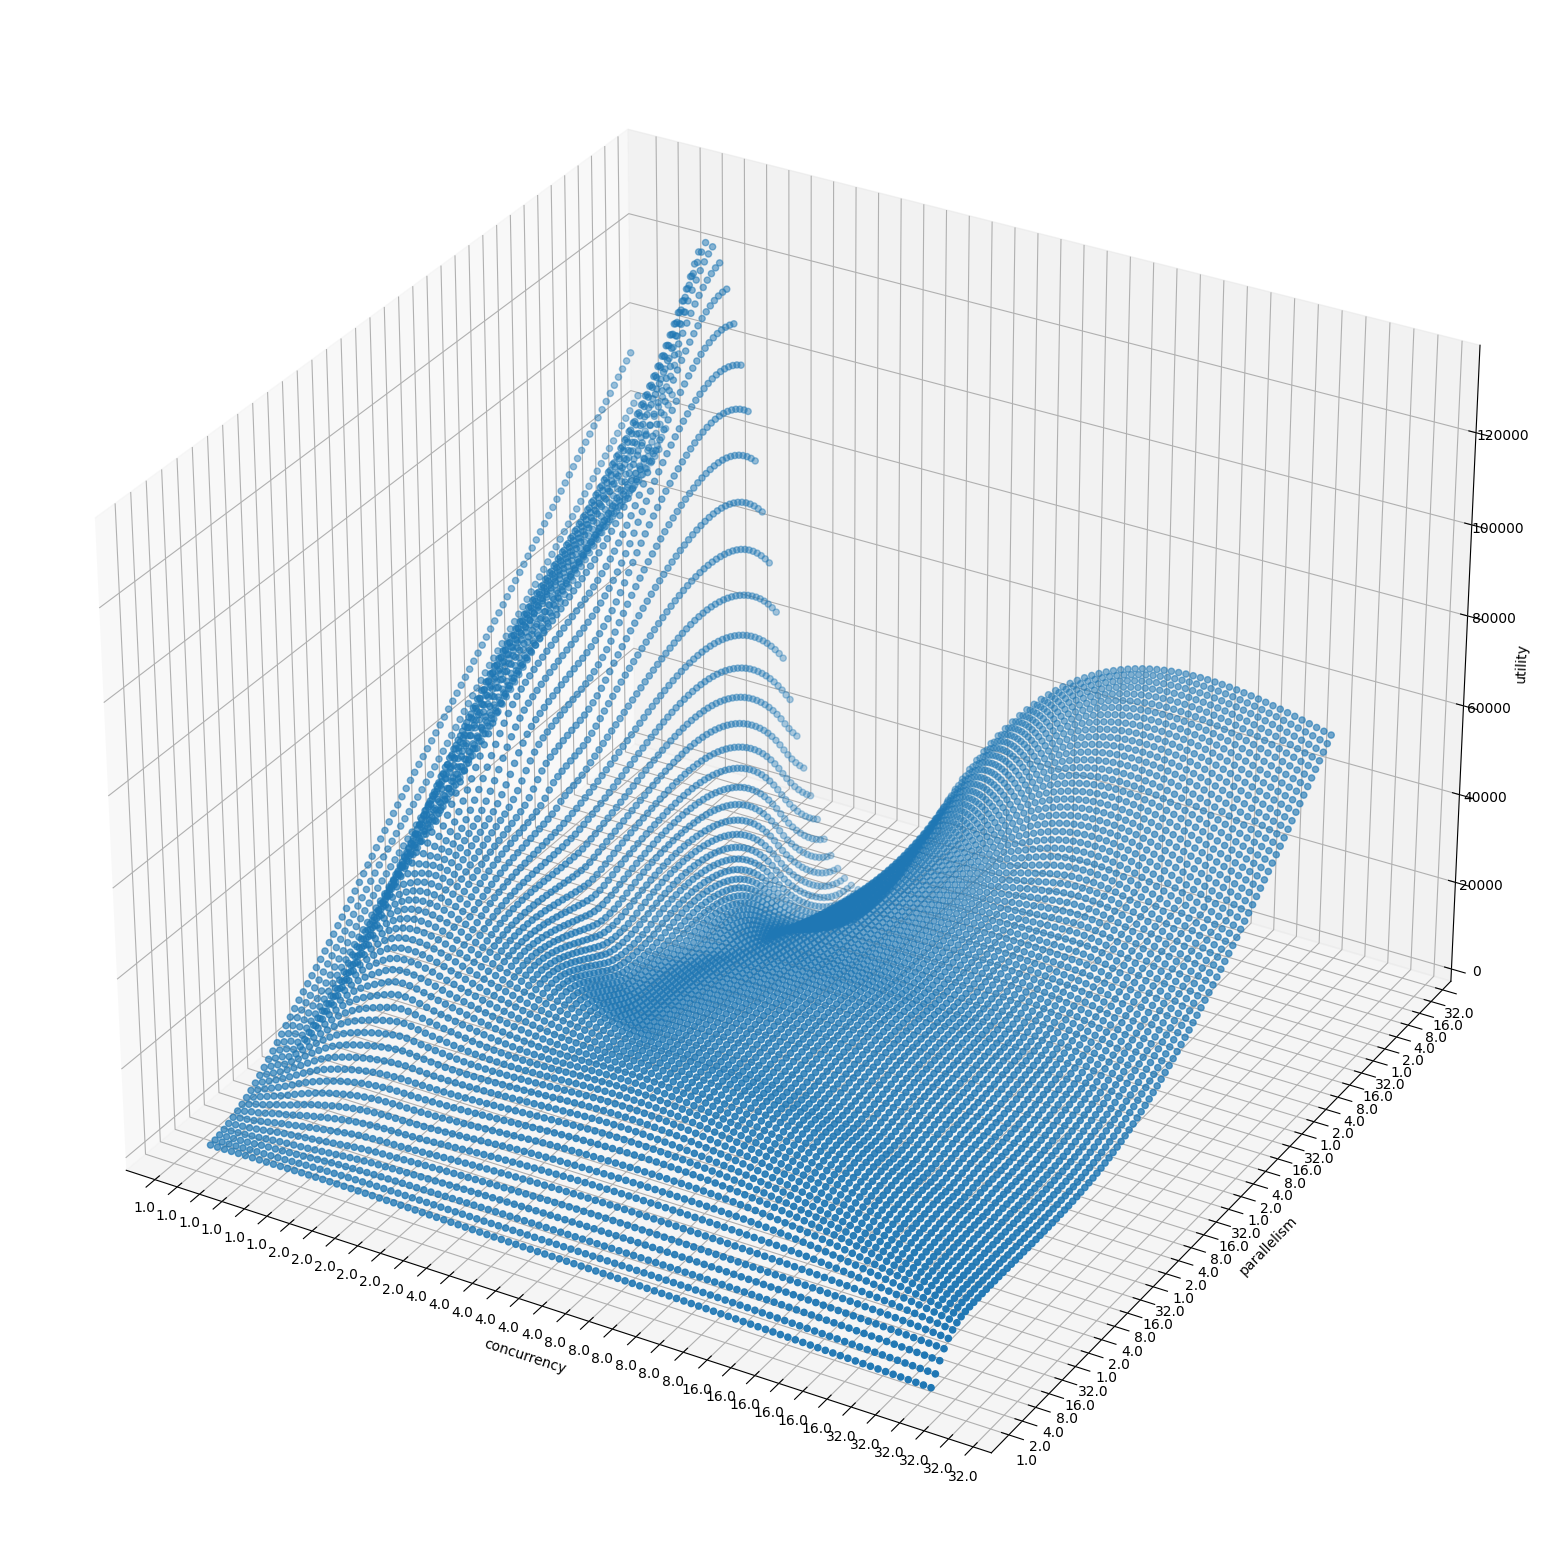

In [ ]:
from scipy.interpolate import griddata

def plottable_3d_info(df: pd.DataFrame):
    """
    Transform Pandas data into a format that's compatible with
    Matplotlib's surface and wireframe plotting.
    """
    index = df.index
    columns = df.columns

    why = len(df.concurrency.to_numpy())
    # x, y = np.meshgrid(np.arange(len(df.concurrency.to_numpy())), np.arange(len(df.parallelism.to_numpy())))
    # print(x)
    x = df.concurrency.to_numpy()
    y = df.parallelism.to_numpy()
    # z = np.array([[v] * why for v in df.utility])
    z = df.utility.to_numpy()
    
    xticks = dict(ticks=np.arange(len(x)), labels=df.concurrency.to_numpy())
    yticks = dict(ticks=np.arange(len(y)), labels=df.parallelism.to_numpy())
    
    return x, y, z, xticks, yticks

### Transform to Matplotlib friendly format.
x, y, z, xticks, yticks = plottable_3d_info(df_3d)

### Set up axes and put data on the surface.
fig = plt.figure(figsize=(20, 20))
axes = fig.add_subplot(projection='3d')
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')
axes.scatter(grid_x, grid_y, grid_z)

### Customize labels and ticks (only really necessary with
### non-numeric axes).
axes.set_xlabel('concurrency')
axes.set_ylabel('parallelism')
axes.set_zlabel('utility')
axes.set_zlim3d(bottom=0)
plt.xticks(**xticks)
plt.yticks(**yticks)

# for ii in range(0,360,1):
#     axes.view_init(elev=10., azim=ii)
#     plt.savefig("movie%d.png" % ii)
#     plt.pause(.001)

# axes.view_init(elev=10., azim=90., roll=0.)
# plt.savefig('linear_regret_2.png')
plt.show()

# Attempt 2

In [906]:
# https://stackoverflow.com/questions/39125423/how-can-i-plot-a-pandas-multiindex-dataframe-as-3d
L = []
for i, group in groups['utility'].groupby(axis=0, level=0):
    L.append(group.values)

big_Z = np.array(L)
z = big_Z.ravel()
print(z)

[1466.84264737 2861.45673484 4381.60604173 3997.46978397 1689.28429202
 2476.70783244 4272.60505304 4142.9639988  2832.50281432  330.11956275
 4361.57208634 4554.45289446 3119.71041474  831.1407174   -40.35448432
 3382.7824123  3047.68905654 1513.59165691  -38.90187429 -289.77863194
 2105.15772201  836.09476836  -69.84857483 -388.67672154 -340.93804078]


In [907]:
xlabels = groups.index.get_level_values('concurrency').unique()
ylabels = groups.index.get_level_values('parallelism').unique()

x = np.arange(xlabels.shape[0])
y = np.arange(ylabels.shape[0])

In [908]:
print(xlabels)
print(ylabels)

Float64Index([2.0, 4.0, 8.0, 16.0, 32.0], dtype='float64', name='concurrency')
Float64Index([2.0, 4.0, 8.0, 16.0, 32.0], dtype='float64', name='parallelism')


In [909]:
x_M, y_M = np.meshgrid(x, y, copy=False)
print(x_M.shape)
print(y_M.shape)

(5, 5)
(5, 5)


In [910]:
print(np.vstack(L))

[[1466.84264737 2861.45673484 4381.60604173 3997.46978397 1689.28429202]
 [2476.70783244 4272.60505304 4142.9639988  2832.50281432  330.11956275]
 [4361.57208634 4554.45289446 3119.71041474  831.1407174   -40.35448432]
 [3382.7824123  3047.68905654 1513.59165691  -38.90187429 -289.77863194]
 [2105.15772201  836.09476836  -69.84857483 -388.67672154 -340.93804078]]


In [911]:
z_list = [z for _ in range(x.shape[0])]
z_stack = np.stack(z_list)
diag_z = np.diag(z)
diag_z[diag_z == 0] = np.nan

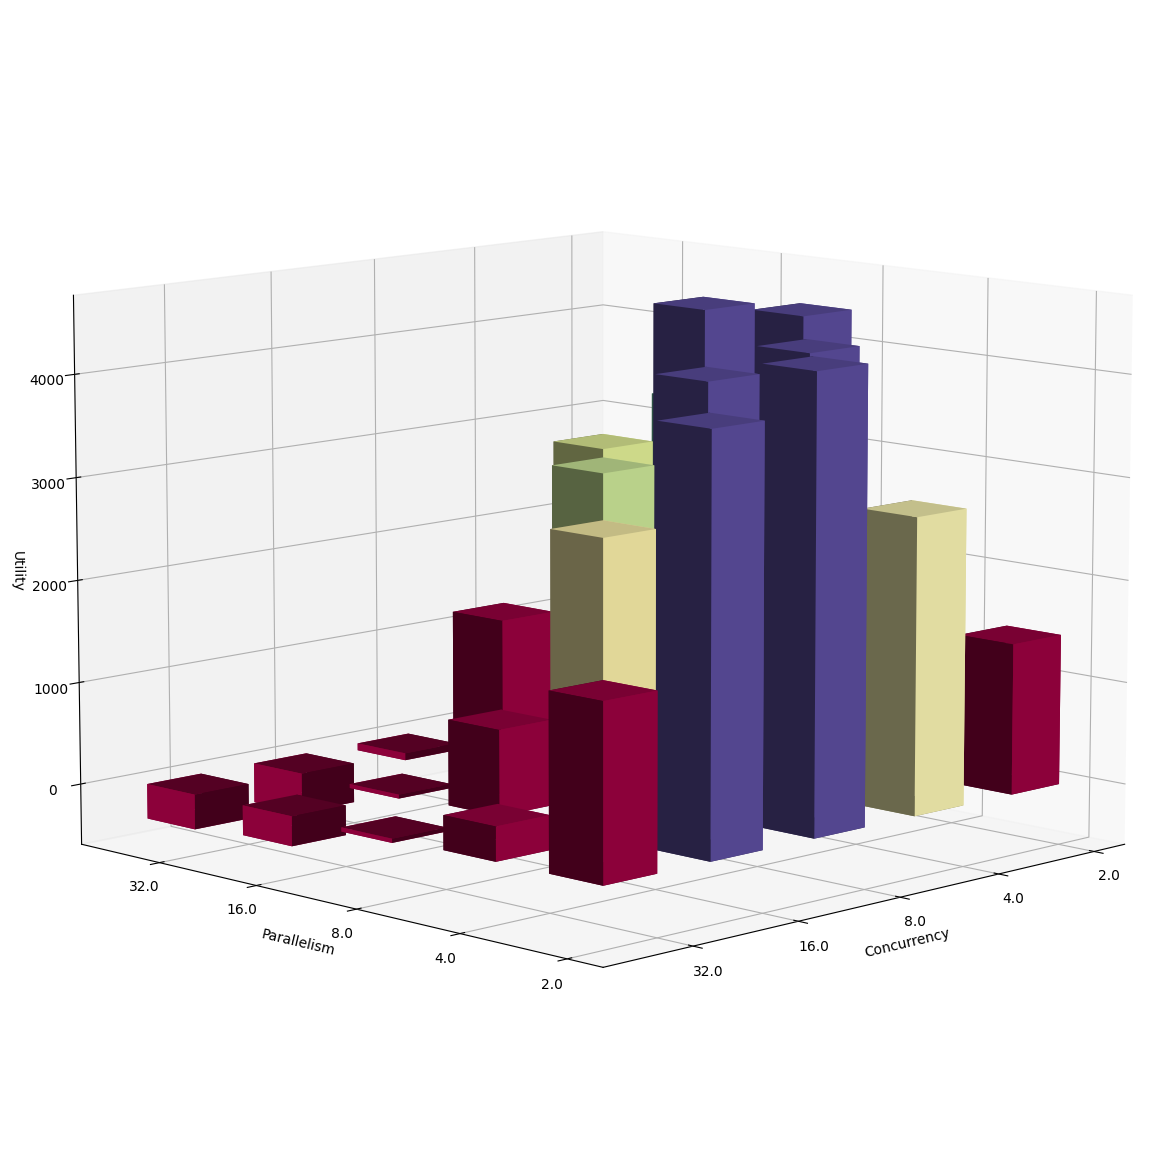

In [918]:
fig = plt.figure(figsize=(15, 15))
axes = fig.add_subplot(111, projection='3d')

axes.set_xticks(x)
axes.set_yticks(y)

axes.xaxis.set_ticklabels(xlabels)
axes.yaxis.set_ticklabels(ylabels)

axes.set_xlabel('Concurrency')
axes.set_ylabel('Parallelism')
axes.set_zlabel('Utility')

axes.set_zlim([np.min(z) - 100, np.max(z) + 100])

values = np.linspace(0.2, 1., x_M.shape[0])

norm_z = (z - np.mean(z)) / np.std(z)
colors = plt.cm.Spectral(norm_z)
# print(colors)

# print(np.diag(x_M))
# print(np.diag(y_M))
# print(z_stack)
# batched_z = np.vstack(L)
# print(batched_z.shape)

# diagonalize z

# grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
# grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# axes.scatter(x_M.ravel(), y_M.ravel(), z_stack.ravel(), color=colors)
# axes.scatter(x_M.ravel(), y_M.ravel(), diag_z.ravel(), color=colors)
# axes.scatter(grid_x, grid_y, grid_z)
# axes.scatter(x_M.ravel(), y_M.ravel(), diag_z.ravel())
axes.bar3d(x_M.ravel(), y_M.ravel(), z.ravel()*0, dx=0.5, dy=0.5, dz=z, color=colors)
axes.invert_yaxis()
axes.view_init(elev=10., azim=45., roll=0.)

plt.savefig('utility_3d_bar.png')
plt.show()

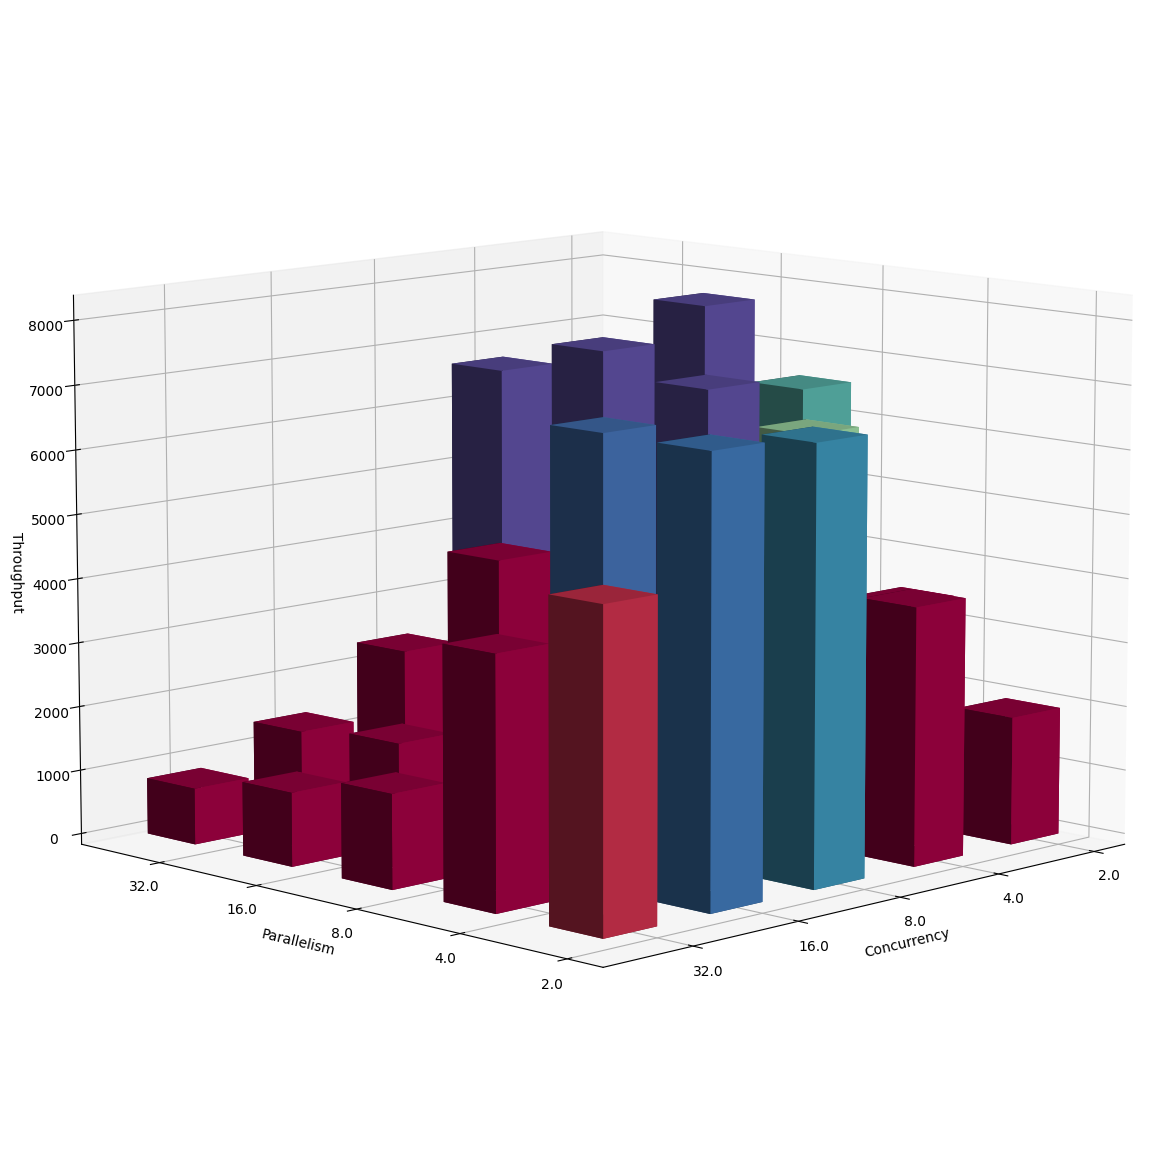

In [925]:
L = []
for i, group in groups['read_throughput'].groupby(axis=0, level=0):
    L.append(group.values)

big_T = np.array(L)
t = big_T.ravel()


fig = plt.figure(figsize=(15, 15))
axes = fig.add_subplot(111, projection='3d')

axes.set_xticks(x)
axes.set_yticks(y)

axes.xaxis.set_ticklabels(xlabels)
axes.yaxis.set_ticklabels(ylabels)

axes.set_xlabel('Concurrency')
axes.set_ylabel('Parallelism')
axes.set_zlabel('Throughput')

axes.set_zlim([0, np.max(t) + 100])

values = np.linspace(0.2, 1., x_M.shape[0])

norm_t = (t - np.mean(t)) / np.std(t)
colors = plt.cm.Spectral(norm_t)
# print(colors)

# print(np.diag(x_M))
# print(np.diag(y_M))
# print(z_stack)
# batched_z = np.vstack(L)
# print(batched_z.shape)

# diagonalize z

# grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
# grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# axes.scatter(x_M.ravel(), y_M.ravel(), z_stack.ravel(), color=colors)
# axes.scatter(x_M.ravel(), y_M.ravel(), diag_z.ravel(), color=colors)
# axes.scatter(grid_x, grid_y, grid_z)
# axes.scatter(x_M.ravel(), y_M.ravel(), diag_z.ravel())
axes.bar3d(x_M.ravel(), y_M.ravel(), t.ravel()*0, dx=0.5, dy=0.5, dz=t, color=colors)
axes.invert_yaxis()
# axes.view_init(elev=0., azim=90., roll=0.)
axes.view_init(elev=10., azim=45., roll=0.)

plt.savefig('throughput_3d_bar.png')
plt.show()

In [923]:
big_T

array([[1978.556138  , 3979.81323043, 6719.34287074, 6842.00676485,
        4882.48073334],
       [3451.49740765, 6355.65415917, 7276.0211536 , 6862.42134742,
        3868.1693463 ],
       [6592.41899443, 8113.6291857 , 7632.82685132, 4692.50192353,
        1457.95609616],
       [5990.83609362, 6921.53698041, 7110.47154124, 1575.26388904,
        1142.03832721],
       [4722.94925747, 4642.01324526, 2415.56080894, 1444.29754114,
         872.6292941 ]])

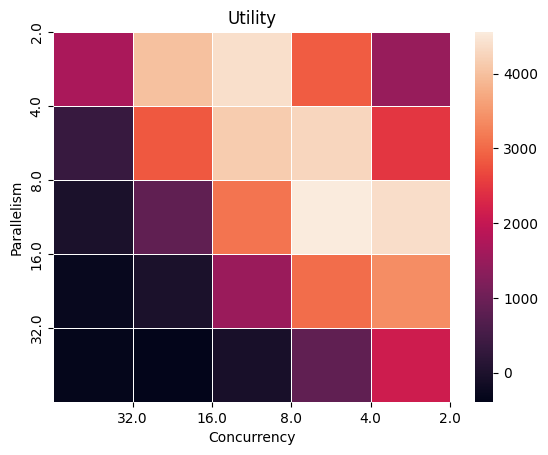

In [915]:
import seaborn as sns
# fig = plt.figure(figsize=(15, 15))
# axes = fig.add_subplot(111)

# axes.set_xticks(x)
# axes.set_yticks(y)

# axes.xaxis.set_ticklabels(xlabels)
# axes.yaxis.set_ticklabels(ylabels)

# axes.set_xlabel('Concurrency')
# axes.set_ylabel('Parallelism')
# axes.set_zlabel('Utility')

# axes.set_zlim([np.min(z) - 100, np.max(z) + 100])

# values = np.linspace(0.2, 1., x_M.shape[0])

# norm_z = (z - np.mean(z)) / np.std(z)
# colors = plt.cm.Spectral(norm_z)

# print(big_Z)
# axes.imshow(big_Z, cmap='hot')

# axes.bar3d(x_M.ravel(), y_M.ravel(), z.ravel()*0, dx=0.5, dy=0.5, dz=z, color=colors)
# axes.invert_yaxis()

axes = sns.heatmap(big_Z, linewidth=0.5)
axes.set_xticks(x)
axes.set_yticks(y)

axes.xaxis.set_ticklabels(xlabels)
axes.yaxis.set_ticklabels(ylabels)

axes.set_xlabel('Concurrency')
axes.set_ylabel('Parallelism')

axes.invert_xaxis()

plt.title('Utility')
plt.savefig('utility_heatmap.png')
plt.show()

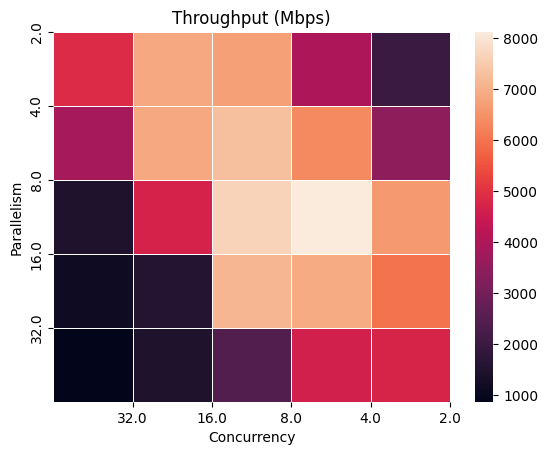

In [916]:
import seaborn as sns

axes = sns.heatmap(big_T, linewidth=0.5)
axes.set_xticks(x)
axes.set_yticks(y)

axes.xaxis.set_ticklabels(xlabels)
axes.yaxis.set_ticklabels(ylabels)

axes.set_xlabel('Concurrency')
axes.set_ylabel('Parallelism')

axes.invert_xaxis()

plt.title('Throughput (Mbps)')
plt.savefig('throughput_heatmap.png')
plt.show()